In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv("/content/swedish_insurance.csv")

In [81]:
copy_of_data = df.copy()

In [82]:
# First few rows of datasets.
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [83]:
# Renaming the columns.
# X ---> Number of claims.
# Y ---> Total payment for all the claims in thousands of Swedish Kronor.
df.rename(columns= {"X": "no_of_claims", "Y": "money_paid"}, inplace= True)

In [84]:
# Confirming the column names.
df.head()

,no_of_claims,money_paid
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [85]:
# Cheking the shape of data.
df.shape

(63, 2)

In [86]:
# Information about data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   no_of_claims  63 non-null     int64  
 1   money_paid    63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [87]:
# Statistical summary of data.
df.describe()

,no_of_claims,money_paid
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


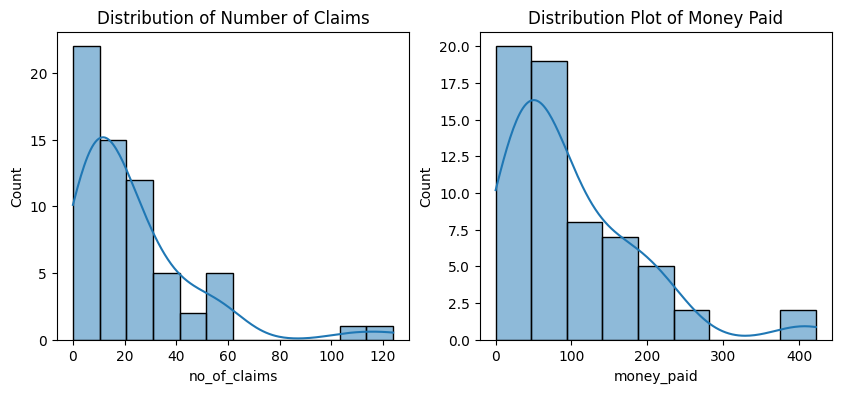

In [88]:
# Visualizing the distribution the attributes.
# Both the columns are right skewed with some outliers.
plt.figure(figsize= (10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df["no_of_claims"], kde= True)
plt.title("Distribution of Number of Claims")

plt.subplot(1, 2, 2)
sns.histplot(df["money_paid"], kde= True)
plt.title("Distribution Plot of Money Paid")

plt.show()

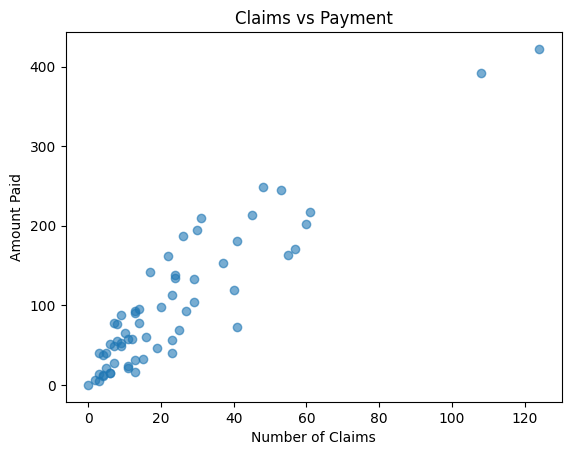

In [89]:
# Checking the relation between the columns.
# The columns are sort of linearly co-related and data have few outliers.
plt.figure()
plt.scatter(df["no_of_claims"], df["money_paid"], alpha= 0.6)
plt.xlabel("Number of Claims")
plt.ylabel("Amount Paid")
plt.title("Claims vs Payment")

plt.show()

In [90]:
# Co-relation matrix, both the columns are positively co-related.
df.corr()

,no_of_claims,money_paid
no_of_claims,1.000000,0.912878
money_paid,0.912878,1.000000


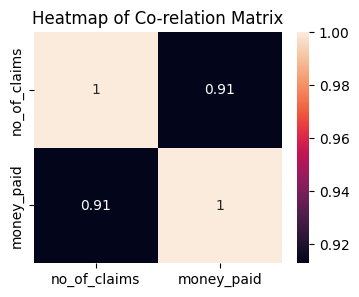

In [91]:
# Visualing the heatmap.
plt.figure(figsize= (4, 3))
sns.heatmap(df.corr(), annot= True)
plt.title("Heatmap of Co-relation Matrix")

plt.show()

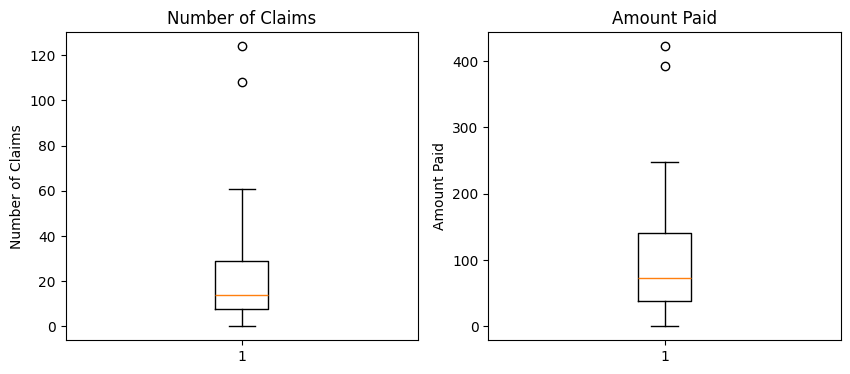

In [92]:
# Using the box plot to better visualize the outliers.
plt.figure(figsize= (10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df["no_of_claims"])
plt.ylabel("Number of Claims")
plt.title("Number of Claims")

plt.subplot(1, 2, 2)
plt.boxplot(df["money_paid"])
plt.ylabel("Amount Paid")
plt.title("Amount Paid")

plt.show()

In [93]:
# Finding the outliers of "no_of_claims" column.
# First quantile.
q1 = np.quantile(df["no_of_claims"], 0.25)
# Third quantile.
q3 = np.quantile(df["no_of_claims"], 0.75)
# Inter quantile range.
iqr = (q3 - q1)

lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)

print("Q1 -", q1)
print("Q3 -", q3)
print("IQR -", iqr)
print("Lower Limit -", lower_limit)
print("Upper Limit -", upper_limit)

Q1 - 7.5
Q3 - 29.0
IQR - 21.5
Lower Limit - -24.75
Upper Limit - 61.25


In [94]:
# Removing the outliers because the regression models are very sensitive to outliers
# and can affect the model's performance and it's matrics.
df = df[(df["no_of_claims"] >= lower_limit) & (df["no_of_claims"] <= upper_limit)]

In [95]:
# Finding the outliers of "money_paid" column.
# First quantile.
q1 = np.quantile(df["money_paid"], 0.25)
# Third quantile.
q3 = np.quantile(df["money_paid"], 0.75)
# Inter quantile range.
iqr = (q3 - q1)

lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)

print("Q1 -", q1)
print("Q3 -", q3)
print("IQR -", iqr)
print("Lower Limit -", lower_limit)
print("Upper Limit -", upper_limit)

Q1 - 38.1
Q3 - 134.9
IQR - 96.80000000000001
Lower Limit - -107.10000000000002
Upper Limit - 280.1


In [96]:
df = df[(df["money_paid"] >= lower_limit) & (df["money_paid"] <= upper_limit)]

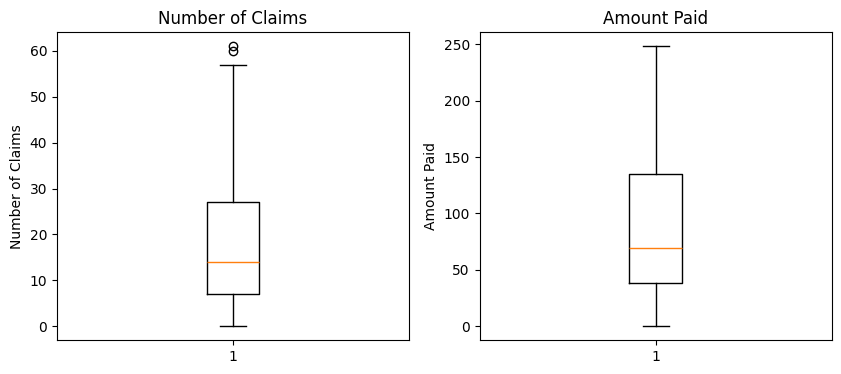

In [98]:
# Cross cheking if outlier has been removed or not.
# Number of Claims column still have some outliers.
plt.figure(figsize= (10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df["no_of_claims"])
plt.ylabel("Number of Claims")
plt.title("Number of Claims")

plt.subplot(1, 2, 2)
plt.boxplot(df["money_paid"])
plt.ylabel("Amount Paid")
plt.title("Amount Paid")

plt.show()

In [99]:
# APPLYING LINEAR REGRESSION MODEL

In [124]:
# Extracting independant variable.
x = df[["no_of_claims"]]
x.head()

,no_of_claims
1,19
2,13
4,40
5,57
6,23


In [125]:
type(x)

pandas.core.frame.DataFrame

In [140]:
# Extracting dependant variable.
y = df[["money_paid"]]
y.head()

,money_paid
1,46.2
2,15.7
4,119.4
5,170.9
6,56.9


In [141]:
type(y)

pandas.core.frame.DataFrame

In [142]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [143]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [144]:
model.fit(x_train, y_train)

LinearRegression()

In [145]:
y_predict = model.predict(x_test)
y_predict

array([[ 83.53052178],
       [ 66.40750147],
       [ 45.85987708],
       [ 35.58606489],
       [ 25.3122527 ],
       [100.6535421 ],
       [227.36389245],
       [ 62.9828974 ],
       [ 42.43527302],
       [158.87181118],
       [ 56.13368927],
       [199.96705994],
       [ 28.73685677]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


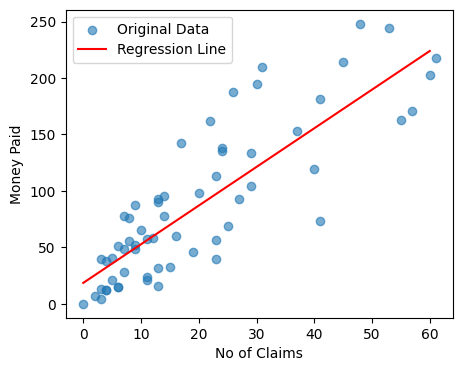

In [162]:
plt.figure(figsize= (5, 4))

# Scatter plot of actual data
plt.scatter(df["no_of_claims"], df["money_paid"], label="Original Data", alpha= 0.6)

# Ensure x_train is sorted to create a proper regression line
x_sorted = np.sort(x_train, axis=0)
y_pred_sorted = model.predict(x_sorted)

# Plot the regression line
plt.plot(x_sorted, y_pred_sorted, color='red', label="Regression Line")

plt.xlabel("No of Claims")
plt.ylabel("Money Paid")
plt.legend()
plt.show()

In [163]:
# Printing the slope and intercept.
slope = round(model.coef_[0][0], 2)
intercept = round(model.intercept_[0], 2)
print("Slope: ", slope)
print("Intercept: ", intercept)

Slope:  3.42
Intercept:  18.46


In [164]:
# Printing the Regression equation.
print(f"y = {slope} * x + {intercept}")

y = 3.42 * x + 18.46


In [165]:
# Measuring the performance of the model.
# Our R2 score is more close to 1.
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predict)
print(f"The R2 score is: {score}")

The R2 score is: 0.8850172658561818


In [166]:
# Interpreting the R2 Score.
"""
The high R2 score means data fits the model and Number of Claims column is able to explain the 88.5%
variability in the Money Paid column.
"""

'\nThe high R2 score means data fits the model and Number of Claims column is able to explain the 88.5%\nvariability in the Money Paid column.\n'